In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import rc, rcParams
f = mticker.ScalarFormatter(useMathText=True)

import scipy
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
from datetime import datetime as dt
from datetime import date, timedelta
import datetime
from matplotlib.dates import YearLocator, DateFormatter

import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
###############
# LaTeX block #
###############

rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Palatino']})
rc('xtick', labelsize=18)
rc('ytick', labelsize=18)
rcParams['legend.numpoints'] = 1

In [3]:
def plot_cosmetics_single():
    
    ax = plt.gca()
    ax.tick_params(direction='in', axis='both', which='major', length=6.5, width=1.2, labelsize=18)
    ax.tick_params(direction='in', axis='both', which='minor', length=3., width=1.2, labelsize=18)
    ax.xaxis.set_tick_params(pad=7)
    ax.xaxis.labelpad = 5
    ax.yaxis.labelpad = 15
    
    
def plot_cosmetics_multi():    
    
    ax = plt.gca()
    ax.tick_params(direction='in', axis='both', which='major', length=6.5, width=1.2, labelsize=20)
    ax.tick_params(direction='in', axis='both', which='minor', length=3., width=1.2, labelsize=20)
    ax.xaxis.set_tick_params(pad=10)
    ax.xaxis.labelpad = 5
    ax.yaxis.labelpad = 10

## Use Ticker to plot directly from Yahoo Finance.

<Axes: title={'center': "APPLE's stock price"}, xlabel='Date'>

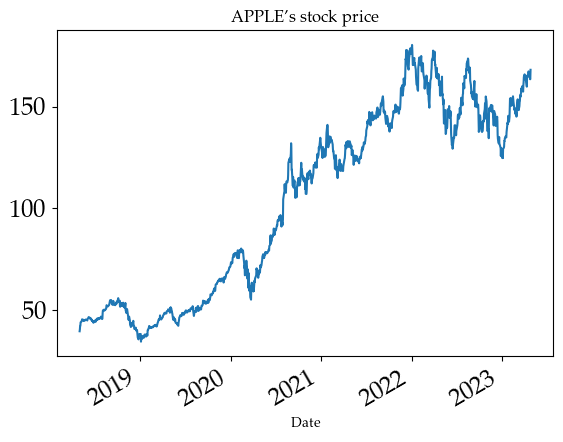

In [4]:
ticker = yf.Ticker('AAPL')
aapl_df_ticker = ticker.history(period="5y")
aapl_df_ticker['Close'].plot(title="APPLE's stock price")

## Get access to the data and also store them in arrays.
I want to obtain the same plot.

In [5]:
# download the series, not necessary for the next step
aapl_df = yf.download('AAPL',
                      start='2019-01-01', 
                      #end='2021-06-12', 
                      progress=False,
)
print(f'Data in a multi-level column frame:\n\n {aapl_df.head()}')
print('')
print('')

# store the date, given the data in a multi-level column frame
aapl_df['Date'] = pd.to_datetime(aapl_df.index)


# store it as a pandas dataframe, to have it accessible as numpy arrays
asset_aapl = pd.DataFrame( yf.download('AAPL', 
                      start='2019-01-01', 
                      #end='2021-06-12', 
                      progress=False)
)
# the following line levels the multi-level column format downloaded from yfinance
asset_aapl = asset_aapl.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
print(f'Levelled the multi-level column frame:\n\n {asset_aapl.head()}')

Data in a multi-level column frame:

                  Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-02  38.722500  39.712502  38.557499  39.480000  38.047047  148158800
2019-01-03  35.994999  36.430000  35.500000  35.547501  34.257282  365248800
2019-01-04  36.132500  37.137501  35.950001  37.064999  35.719700  234428400
2019-01-07  37.174999  37.207500  36.474998  36.982498  35.640198  219111200
2019-01-08  37.389999  37.955002  37.130001  37.687500  36.319603  164101200


Levelled the multi-level column frame:

         Date       Open       High        Low      Close  Adj Close     Volume
0 2019-01-02  38.722500  39.712502  38.557499  39.480000  38.047050  148158800
1 2019-01-03  35.994999  36.430000  35.500000  35.547501  34.257278  365248800
2 2019-01-04  36.132500  37.137501  35.950001  37.064999  35.719700  234428400
3 2019-01-07  37.174999  37.207500  36.474998  36.982498  35.640

Data spanning 1576 days, from 2019-01-02 00:00:00 to 2023-04-27 00:00:00.


Text(0.5, 0, 'Date')

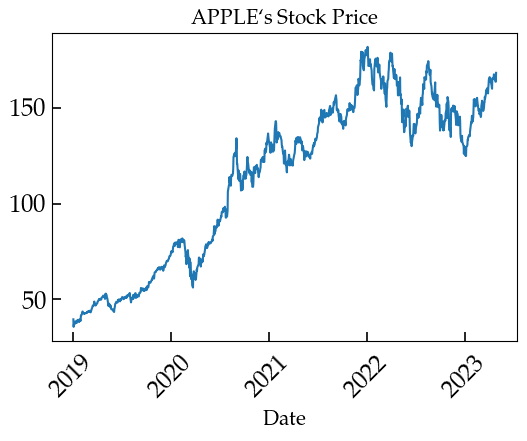

In [6]:
# access the the dataframe

closing_price_aapl = asset_aapl.loc[:, 'Close']
asset_aapl['Date'] = asset_aapl.loc[:, 'Date']           


print(f'Data spanning {(asset_aapl.Date.max() - asset_aapl.Date.min()).days} days, from {asset_aapl.Date.min()} to {asset_aapl.Date.max()}.')


f, ax = plt.subplots(figsize = [6., 4.])
plot_cosmetics_single()

ax.set_title('APPLE`s Stock Price', fontsize=15)
ax.plot(asset_aapl['Date'], closing_price_aapl)
ax.xaxis.set_major_locator(YearLocator(1))
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel('Date', fontsize=15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1088 non-null   datetime64[ns]
 1   Open       1088 non-null   float64       
 2   High       1088 non-null   float64       
 3   Low        1088 non-null   float64       
 4   Close      1088 non-null   float64       
 5   Adj Close  1088 non-null   float64       
 6   Volume     1088 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 59.6 KB


<Axes: >

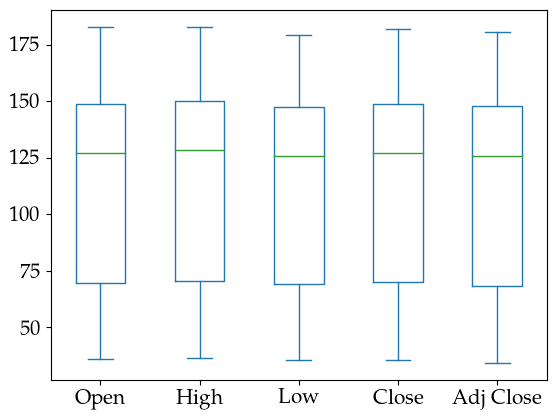

In [7]:
asset_aapl.info()
asset_aapl[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box', fontsize=15)

## I want to make the plot interactive.

In [8]:
iplot_layout = go.Layout(
    title = 'Stock Prices of Apple',
    xaxis = dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis = dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

apple_data = [{ 'x' : asset_aapl['Date'], 'y' : asset_aapl['Close'] }]
plot = go.Figure(data=apple_data, layout=iplot_layout)


iplot(plot)

In [9]:
# build the regression model
from sklearn.model_selection import train_test_split

# preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [10]:
asset_aapl['Date'] = pd.to_datetime(asset_aapl['Date'])
X = np.array(asset_aapl.index).reshape(-1,1)
Y = asset_aapl['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

print(X.shape, Y.shape)

(1088, 1) (1088,)


In [11]:
# check if the tickers are in one level

print(asset_aapl['Date'])

0      2019-01-02
1      2019-01-03
2      2019-01-04
3      2019-01-07
4      2019-01-08
          ...    
1083   2023-04-21
1084   2023-04-24
1085   2023-04-25
1086   2023-04-26
1087   2023-04-27
Name: Date, Length: 1088, dtype: datetime64[ns]


In [12]:
scaler = StandardScaler().fit(X_train)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# create a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [15]:
# Plot actual and predicted values for train dataset

trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train, 
    mode = 'markers',
    name = 'Actual'
)

trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)

apple_data = [trace0, trace1]
iplot_layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=apple_data, layout=iplot_layout)

In [18]:
iplot(plot2)

# evaluate the model
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''

print(scores)


Metric           Train                Test        
r2_score  0.8340892614340932	0.850078254001619
MSE       300.3398680445362	290.406474385548

